In [19]:
import pandas as pd

import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../check_agreement_topics/sensitive_topics_vers3.csv")

In [3]:
df.head()

,text,offline_crime,online_crime,drugs,gambling,pornography,prostitution,slavery,suicide,terrorism,weapons,body_shaming,health_shaming,politics,racism,religion,sexual_minorities,sexism,social_injustice,source
0,РРРРРРЯЯЯЯЯЯЯ РУССКИЕ ВАНЬКИ НИКОМУ НЕ НУЖНЫ!!...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,toloka
1,Бабы это вообще безхуйные сиськастые ссущие си...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,trtest
2,изнасиловалиа говорила что девственницаЯ так д...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,trtest
3,Взгляните на пизду. Как психически здоровый че...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,toloka
4,так она не шлюха.видно что нищенка и при эт...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,trtest


In [4]:
from collections import Counter
Counter(df['source']).most_common(10)

[('kw', 21656),
 ('toloka', 8766),
 ('self', 1978),
 ('no_kw_manual_relabel', 600),
 ('toloka_real_manual_relabel', 526),
 ('trtest', 378)]

In [5]:
df_kw = df[df['source'] == 'kw']

In [6]:
df_self= df[df['source'].isin(['self','no_kw_manual_relabel'])]

In [7]:
df_toloka= df[df['source'].isin(['toloka','toloka_real_manual_relabel','trtest'])]

In [52]:
def get_count(df):
    
    def round_up(val):
        if float(val) > 0.5:
            return 1
        return 0

    df_count = pd.DataFrame()
    for c in topics:
        if c != 'text':
            df_count[c] = df[c].apply(round_up)
            
    counts = []
    names = []
    for col in df_count.columns:
        cnt = sum(df_count[col])
        counts.append(cnt)
        names.append(col)
        
    df_count_fin = pd.DataFrame({'class':names, 'count':counts})
    df_count_fin_sorted = df_count_fin.sort_values('class', ascending = False)
    return df_count_fin_sorted

In [53]:
topics = sorted(['offline_crime', 'online_crime', 'drugs', 'gambling', 'pornography',
       'prostitution', 'slavery', 'suicide', 'terrorism', 'weapons',
       'body_shaming', 'health_shaming', 'politics', 'racism', 'religion',
       'sexual_minorities', 'sexism', 'social_injustice'])

# topics

In [54]:
df_kw_CNT = get_count(df_kw)
df_self_CNT = get_count(df_self)
df_toloka_CNT = get_count(df_toloka)

In [55]:
df_kw_CNT.head()

,class,count
17,weapons,736
16,terrorism,1041
15,suicide,371
14,social_injustice,826
13,slavery,844


In [56]:
np.array([2*i for i in range(len(df_kw_CNT))])

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34])

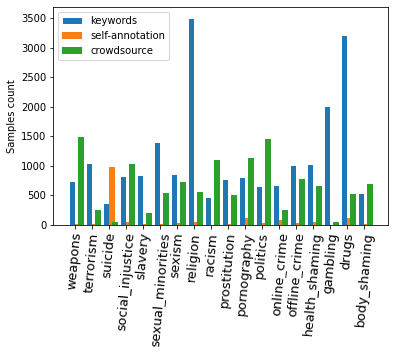

In [57]:
# plt.figure(figsize=(16,14))

fig, ax = plt.subplots()
topic_width = 0.35
x_topics = np.arange(len(df_kw_CNT))
# x_topics = np.array([1.5*i for i in range(len(df_kw_CNT))])


# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')

ax.bar(x_topics - topic_width/2, df_kw_CNT['count'].tolist(), topic_width, label='keywords', capsize=2,edgecolor = 'white')
ax.bar(x_topics + topic_width/2, df_self_CNT['count'].tolist(), topic_width, label='self-annotation', capsize=2,)
ax.bar(x_topics + topic_width , df_toloka_CNT['count'].tolist(), topic_width, label='crowdsource', capsize=2,)

# rects2 = ax.bar(x_topics + topic_width/2, multi_dataset_count, topic_width, color='r', label = 'Sensitive dataset')

ax.set_xticks(x_topics)
ax.set_xticklabels(df_kw_CNT['class'].tolist())

plt.xticks(rotation = 85, fontsize=13)
ax.set_ylabel('Samples count')
# ax.set_title('Scores by group and gender')
ax.legend(loc='best')

# ax.legend(bbox_to_anchor=(0.15, 1.1), loc='upper left',fontsize=12)

# 

# plt.show()
plt.savefig("multilabel_source_plot.pdf",format='pdf', bbox_inches='tight')